In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

df = pd.read_csv("../data/Advertising.csv", index_col=0)
X, y = df.drop("Sales", axis=1), df["Sales"]
model_poly = PolynomialFeatures(3, include_bias=False)
poly_features = model_poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((134, 19), (66, 19), (134,), (66,))

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

print(f"Scaled X_train_mean {scaled_X_train.mean():.2f}, std {scaled_X_train.std():.2f}")
print(f"Scaled X_test_mean {scaled_X_test.mean():.2f}, std {scaled_X_test.std():.2f}")

Scaled X_train_mean -0.00, std 1.00
Scaled X_test_mean -0.12, std 1.12


In [5]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Ridge Regression penalty=0  == vanlig linjär regression
def ridge_regression(X, penalty=0):
    model_ridge = Ridge(alpha=penalty)
    model_ridge.fit(scaled_X_train, y_train)
    y_pred = model_ridge.predict(X)
    return y_pred

y_pred = ridge_regression(scaled_X_test, penalty=0.2)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)
MSE, RMSE, MAE

(0.37323673323812423, 0.6109310380379477, 0.4845959994544089)

In [8]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=.1)
model_lasso.fit(scaled_X_train, y_train)
y_pred = model_lasso.predict(scaled_X_test)
np.sqrt(mean_squared_error(y_test, y_pred)), mean_absolute_error(y_test, y_pred)
model_lasso.coef_

array([ 1.89480144,  0.42062367,  0.        , -0.        ,  3.55216501,
        0.        ,  0.        ,  0.01110965,  0.        , -0.42677394,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.06706906,  0.        ,  0.        ])

In [15]:
from sklearn.linear_model import RidgeCV
model_ridgeCV = RidgeCV(alphas=[.0001, .001, .01, .1, .5, 10], scoring="neg_mean_squared_error", cv=5)
model_ridgeCV.fit(scaled_X_train, y_train)
print(model_ridgeCV.alpha_)

0.5


In [19]:
from sklearn.linear_model import LassoCV
model_LassoCV = LassoCV(eps=0.001, n_alphas=100, max_iter=10000, cv=5)
model_LassoCV.fit(scaled_X_train, y_train)

y_pred = model_LassoCV.predict(scaled_X_test)

model_LassoCV.alpha_, np.sqrt(mean_squared_error(y_test, y_pred)), mean_absolute_error(y_test, y_pred)

(0.004968802520343365, 0.5785146895301981, 0.4629188302693299)

In [23]:
from sklearn.linear_model import ElasticNetCV

model_elastic = ElasticNetCV(l1_ratio=[.1,.5,.7,.9,.95,.99,1], eps=0.001, n_alphas=100, max_iter=100000)
model_elastic.fit(scaled_X_train, y_train)
y_pred = model_elastic.predict(scaled_X_test)

model_elastic.l1_ratio_, model_elastic.alpha_, np.sqrt(mean_squared_error(y_test, y_pred)), mean_absolute_error(y_test, y_pred)

(1.0, 0.004968802520343365, 0.5785146895301981, 0.4629188302693299)

# Gradient Descent

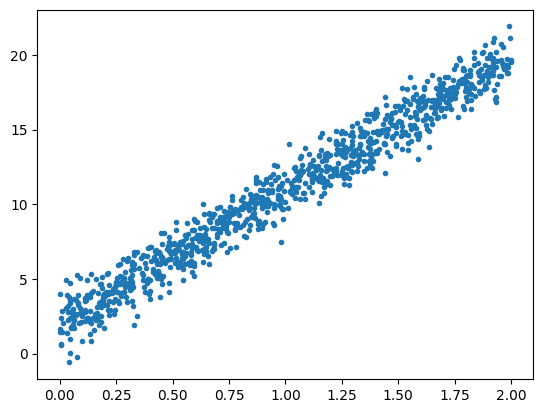

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

samples = 1000

X = 2*np.random.rand(samples, 1)
y = 2+9*X+np.random.randn(samples, 1)

plt.plot(X,y, '.');

In [4]:
X = np.c_[np.ones(samples), X]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((670, 2), (330, 2), (670, 1), (330, 1))

In [90]:
def gradient_descent(X, y, learning_rate=.1, iterations=100):
    n = len(X)
    # Sätter koefficienterna till random startvärde
    theta = np.random.randn(X.shape[1],1)

    # X@theta = y_hat
    for _ in range(iterations):
        gradient = 2/n*X.T@(X@theta-y)
        theta -= learning_rate*gradient 
    return theta

theta = gradient_descent(X, y.reshape(-1,1))
theta.reshape(-1)

array([2.14736286, 8.81700184])

In [86]:
steps = range(1,200,1)
thetas = [gradient_descent(X, y, iterations = iteration).reshape(-1) for iteration in steps]
thetas = np.array(thetas)
thetas.shape

(199, 2)

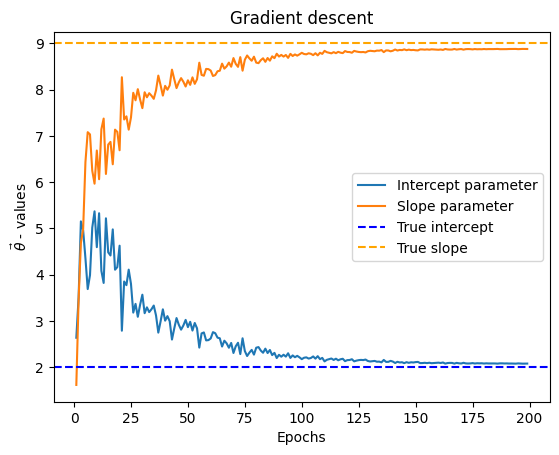

In [9]:
fig, ax = plt.figure(dpi=100), plt.axes()
ax.plot(steps, thetas, label = ["Intercept parameter", "Slope parameter"])
ax.axhline(y=2, color='b', linestyle='--', label="True intercept")
ax.axhline(y=9, color='orange', linestyle='--', label="True slope")
# one epoch is when algorithm seen the whole data once
ax.set(xlabel = "Epochs", ylabel = r"$\vec{\theta}$ - values", title="Gradient descent" )
ax.legend();

In [160]:
theta = np.random.randn(2,1)
n = len(X_train)
epochs = 10
t0, t1 = 5, 50  # learning schedule hyperparameters


for epoch in range(epochs):
    for i in range(n):
        random_index = np.random.randint(n)
        x_i = X_train[random_index:random_index+1] # this gives an extra dimension on the matrix
        y_i = y_train[random_index:random_index+1]
        gradients = 2*x_i.T.dot(x_i.dot(theta)-y_i)
        eta = t0/(epoch*n+i+t1)
        theta -= eta*gradients

# with so few epochs we already reach near optimal solution
theta

array([[2.01284574],
       [8.84630699]])

In [162]:
y_pred = X_test@theta
MAE = np.mean(np.absolute(y_test-y_pred))
MSE = np.mean((y_test-y_pred)**2)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(0.7606521231459912, 0.9049732854276411, 0.9513008385508976)

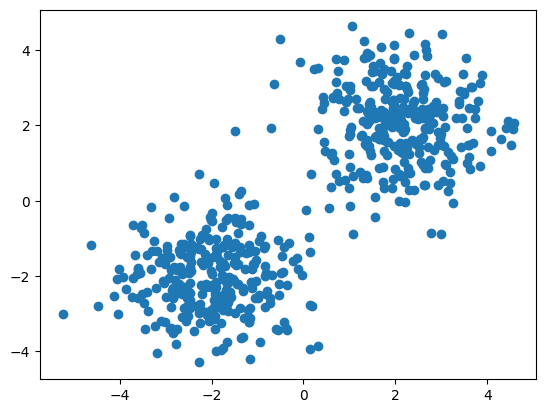

In [7]:
# SVM 
# from utils import plot_svm_margins
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

blobs = make_blobs([300,300], 2, centers=[(-2,-2), (2,2)], random_state=42)[0]
plt.scatter(blobs[:, 0], blobs[:, 1])


In [12]:
from sklearn.cluster import KMeans

kmean = KMeans(2)
kmean.fit(blobs)
blobs = np.c_[blobs, kmean.predict(blobs)] 

df = pd.DataFrame(blobs, columns=["x1", "x2", "label"])
sns.scatterplot(data=df, x="x1", y="x2", hue="label")

ValueError: Shape of passed values is (600, 6), indices imply (600, 3)

In [13]:
X, y = df.drop("label", axis=1).to_numpy(), df["label"].to_numpy()

NameError: name 'df' is not defined

# Besluts Träd

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv('../data/Hitters.csv')
df.head()

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64(1), 

<Axes: xlabel='Years', ylabel='Hits'>

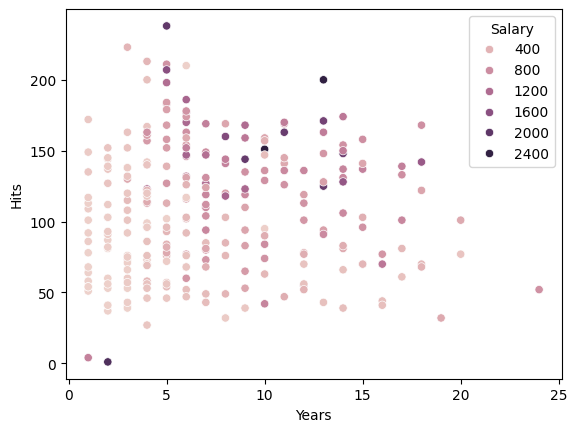

In [8]:
sns.scatterplot(data=df, x="Years", y="Hits", hue="Salary")

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

model_tree_reg = DecisionTreeRegressor(max_depth=2)

X, y = df[["Years", "Hits"]], df["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

In [31]:
model_tree_reg.fit(X_train, y_train)
model_tree_reg.feature_importances_

array([0.58742156, 0.41257844])

[Text(0.5, 0.8333333333333334, 'Years <= 4.5\nsamples = 210\nvalue = 543.665'),
 Text(0.25, 0.5, 'Years <= 3.5\nsamples = 70\nvalue = 203.836'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'samples = 51\nvalue = 151.098'),
 Text(0.375, 0.16666666666666666, 'samples = 19\nvalue = 345.395'),
 Text(0.75, 0.5, 'Hits <= 117.5\nsamples = 140\nvalue = 713.579'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'samples = 73\nvalue = 472.251'),
 Text(0.875, 0.16666666666666666, 'samples = 67\nvalue = 976.518')]

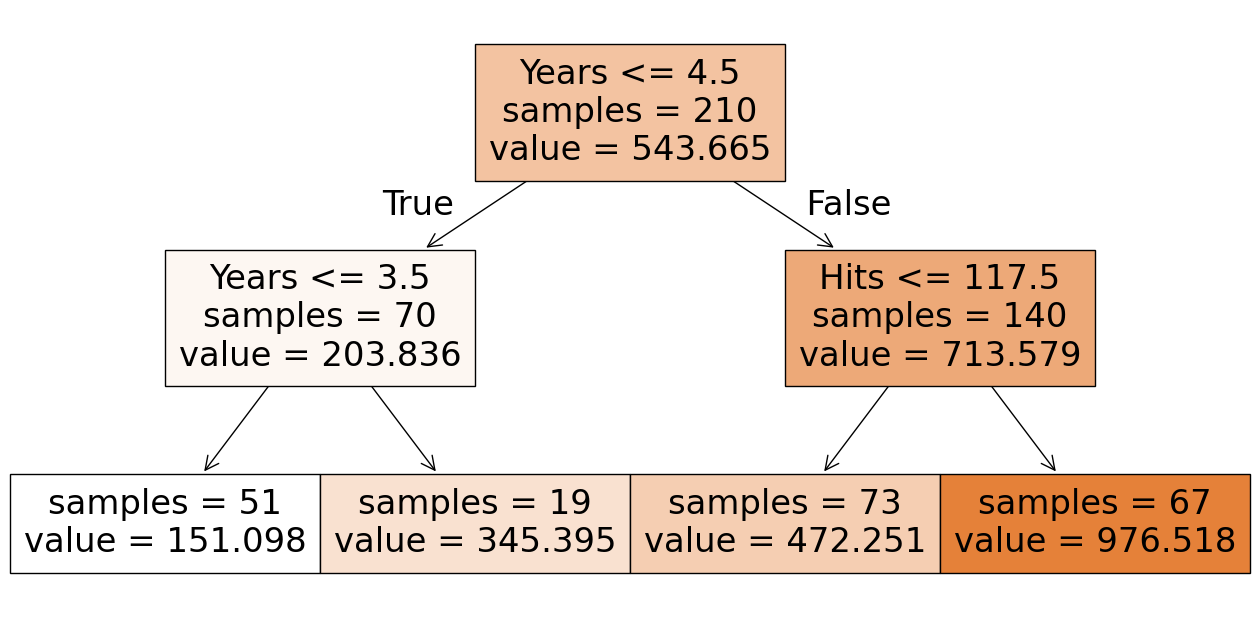

In [32]:
from sklearn import tree

fig, ax= plt.figure(figsize=(16, 8), dpi=100), plt.axes()

tree.plot_tree(model_tree_reg, filled=True, ax=ax, feature_names=list(X.columns), impurity=False, rounded=False)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
y_hat = model_tree_reg.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_hat)), mean_absolute_error(y_test, y_hat)

(379.69119483603174, 235.0067581537342)

In [36]:
df = pd.read_csv('../data/Default.csv')
df = pd.get_dummies(df, drop_first=True)
df.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,False,False
1,817.180407,12106.134700,False,True
2,1073.549164,31767.138947,False,False
3,529.250605,35704.493935,False,False
4,785.655883,38463.495879,False,False


In [37]:
X, y  = df.drop('default_Yes', axis=1), df["default_Yes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


              precision    recall  f1-score   support

       False       0.98      0.98      0.98      1937
        True       0.33      0.38      0.36        63

    accuracy                           0.96      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.96      0.96      0.96      2000



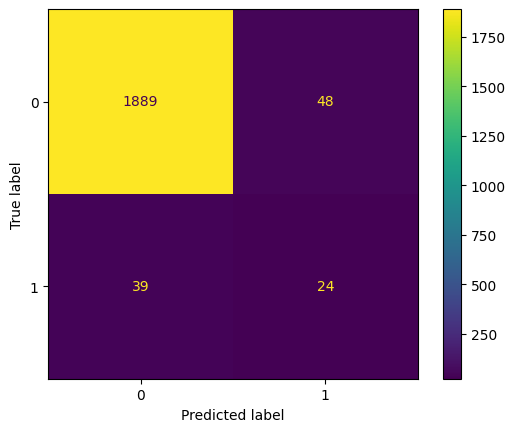

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

print(classification_report(y_test, y_hat))
cm = confusion_matrix(y_test, y_hat)
ConfusionMatrixDisplay(cm).plot()